In [3]:
# Load necessary libraries
library(tidyverse)
library(ggplot2)

# Load the dataset
insurance_data <- read.csv("insurance.csv")



In [4]:
# Explore the structure of the dataset
summary(insurance_data)
str(insurance_data)



      age            sex                 bmi           children    
 Min.   :18.00   Length:1338        Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.13   Max.   :5.000  
    smoker             region             charges     
 Length:1338        Length:1338        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4740  
 Mode  :character   Mode  :character   Median : 9382  
                                       Mean   :13270  
                                       3rd Qu.:16640  
                                       Max.   :63770  

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : chr  "female" "male" "male" "male" ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : chr  "yes" "no" "no" "no" ...
 $ region  : chr  "southwest" "southeast" "southeast" "northwest" ...
 $ charges : num  16885 1726 4449 21984 3867 ...


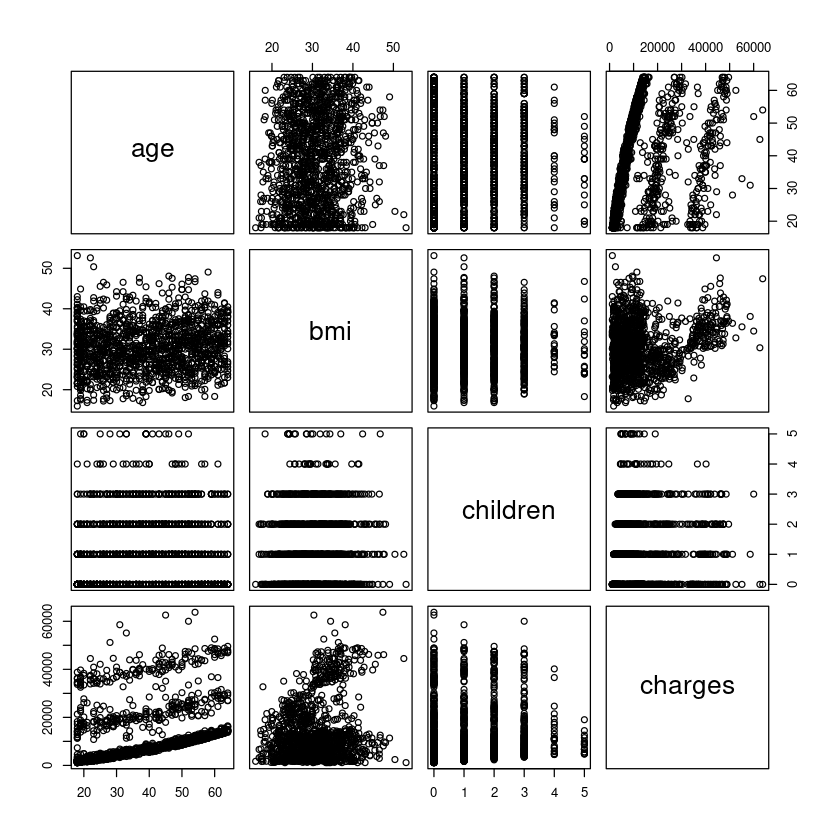

In [5]:
# Data visualization
# Scatterplot matrix to visualize relationships between numerical variables
pairs(insurance_data[, c("age", "bmi", "children", "charges")])



`geom_smooth()` using formula = 'y ~ x'


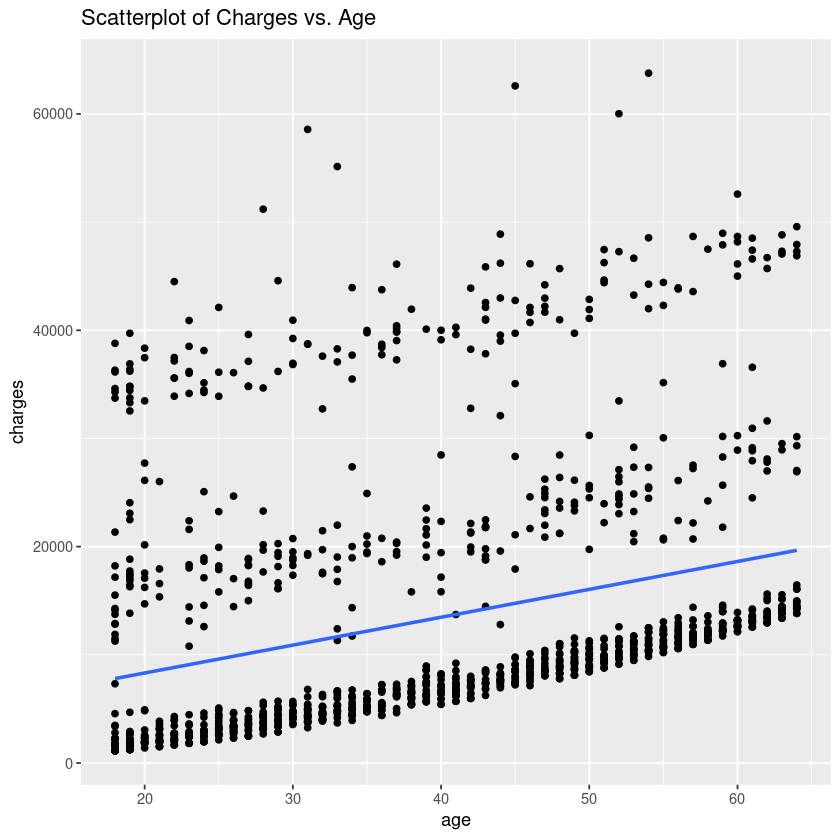

In [6]:
# Scatterplot of charges vs. age
ggplot(insurance_data, aes(x = age, y = charges)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Scatterplot of Charges vs. Age")



`geom_smooth()` using formula = 'y ~ x'


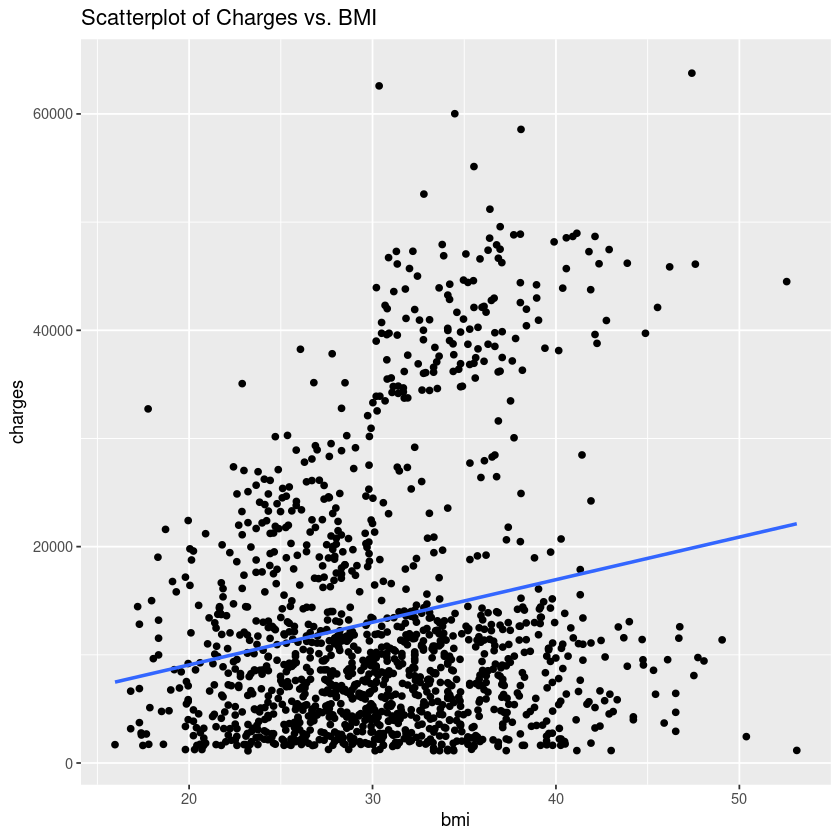

In [7]:
# Scatterplot of charges vs. bmi
ggplot(insurance_data, aes(x = bmi, y = charges)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Scatterplot of Charges vs. BMI")



`geom_smooth()` using formula = 'y ~ x'


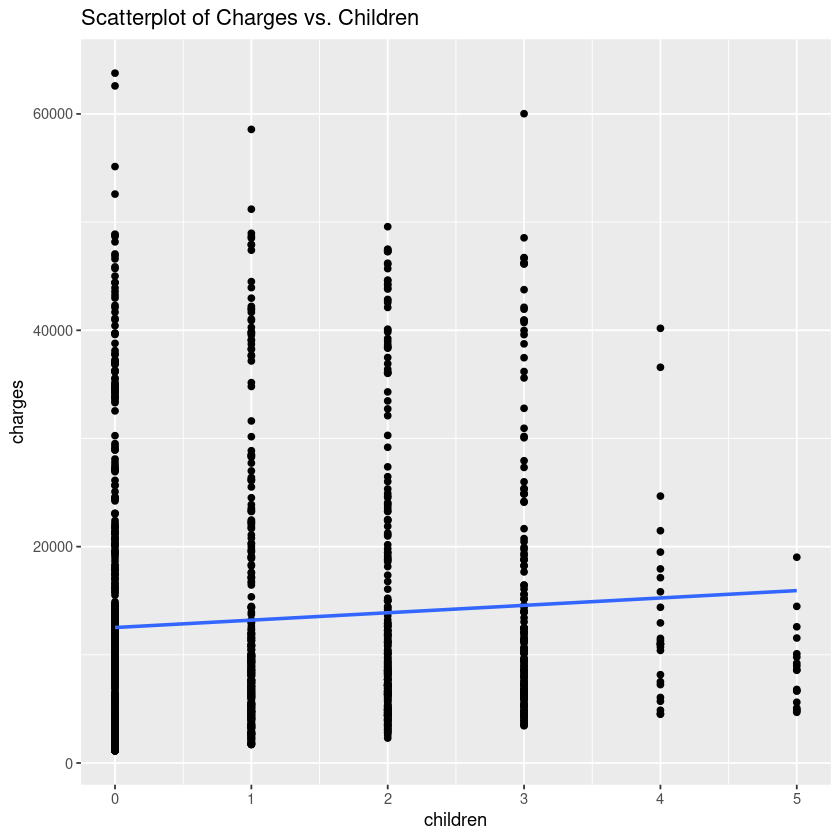

In [8]:
# Scatterplot of charges vs. children
ggplot(insurance_data, aes(x = children, y = charges)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Scatterplot of Charges vs. Children")



In [9]:
# Build a linear regression model
model <- lm(charges ~ age + bmi + children, data = insurance_data)

# Display the summary of the regression model
summary(model)




Call:
lm(formula = charges ~ age + bmi + children, data = insurance_data)

Residuals:
   Min     1Q Median     3Q    Max 
-13884  -6994  -5092   7125  48627 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6916.24    1757.48  -3.935 8.74e-05 ***
age           239.99      22.29  10.767  < 2e-16 ***
bmi           332.08      51.31   6.472 1.35e-10 ***
children      542.86     258.24   2.102   0.0357 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11370 on 1334 degrees of freedom
Multiple R-squared:  0.1201,	Adjusted R-squared:  0.1181 
F-statistic: 60.69 on 3 and 1334 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


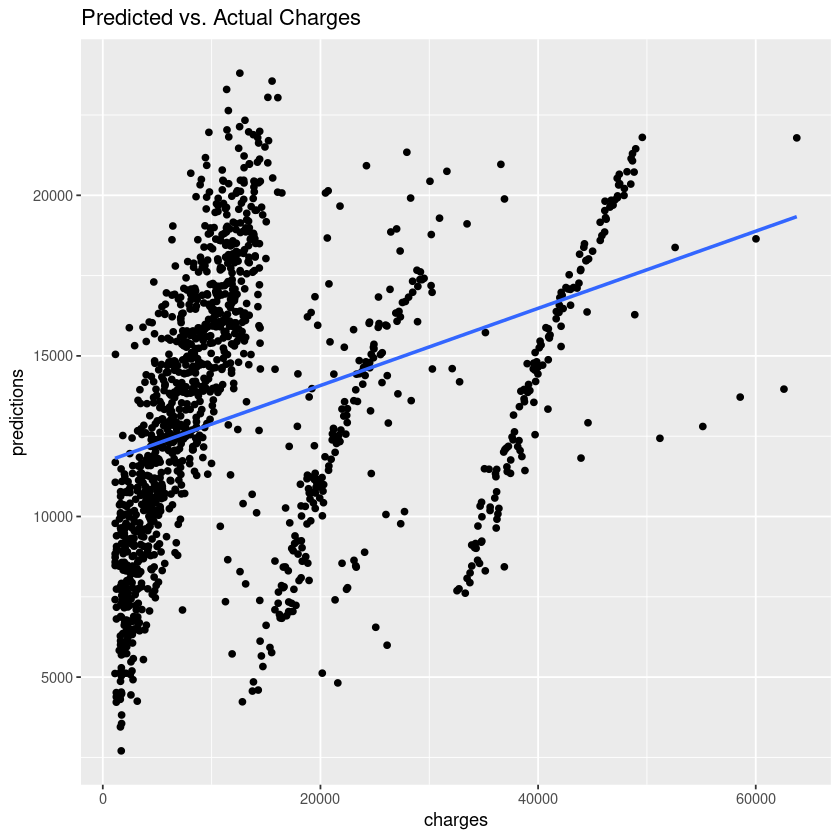

In [10]:
# Make predictions using the model
predictions <- predict(model, newdata = insurance_data)

# Visualize predicted vs. actual charges
ggplot(insurance_data, aes(x = charges, y = predictions)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Predicted vs. Actual Charges")



In [11]:
# Evaluate the model
# You can use additional evaluation metrics based on your specific requirements
mse <- mean((predictions - insurance_data$charges)^2)
rmse <- sqrt(mse)
cat("Mean Squared Error (MSE):", mse, "\n")
cat("Root Mean Squared Error (RMSE):", rmse, "\n")


Mean Squared Error (MSE): 128943245 
Root Mean Squared Error (RMSE): 11355.32 
